In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_low(x):
    return np.sin(8*np.pi*x)

def f_high(x):
    return (x-np.sqrt(2)) * (f_low(x))**2

num_cheap = 30
num_expensive = 10

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
from prettytable import PrettyTable
#import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error, r2_score
import emukit.examples.multi_fidelity_dgp

In [3]:
from emukit.core import ContinuousParameter, ParameterSpace
from emukit.core.initial_designs import LatinDesign
from emukit.examples.multi_fidelity_dgp.multi_fidelity_deep_gp import MultiFidelityDeepGP

/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [4]:
X=[]
X.append(X1)

In [5]:
X.append(X2)

In [6]:
Y=[]
Y.append(Yc)
Y.append(Ye)

In [7]:
mf_dgp_fix_lf_mean = MultiFidelityDeepGP(X, Y, n_iter=1000)

In [8]:
mf_dgp_fix_lf_mean.name = 'mf_dgp_fix_lf_mean'

In [9]:
mf_dgp_fix_lf_mean.optimize()

In [10]:
X_test = np.linspace(0,1,99)[:,None]
#X_test = np.hstack((X_test,np.ones(99,1)))

#y_mean, y_var = mf_dgp_fix_lf_mean.predict(X_test)

In [11]:
tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
tmp.shape

(99, 1)

In [12]:
X_test = np.hstack((X_test,tmp))

In [13]:
y_mean, y_var = mf_dgp_fix_lf_mean.predict(X_test)

In [14]:
y_up = y_mean+1.96*np.sqrt(y_var)

In [15]:
y_down = y_mean - 1.96*np.sqrt(y_var)

In [16]:
X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

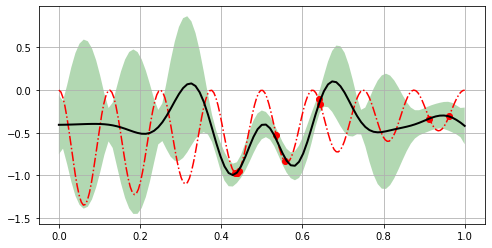

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.grid()
plt.show()

In [18]:
fig.savefig('nonlinearA_Cutajar.pdf', bbox_inches='tight')